In [20]:
import pandas as pd
import sklearn as sk
import scipy as sc
import scipy.stats as stats
import numpy as np
import seaborn as sns

In [21]:
from BAMT.bayesian.train_bn import structure_learning, parameter_learning
from BAMT.preprocess.discretization import get_nodes_type, discretization, code_categories, get_nodes_sign
from BAMT.bayesian.save_bn import save_structure, save_params, read_structure, read_params
from BAMT.bayesian.sampling import generate_synthetics
from BAMT.external.libpgm.hybayesiannetwork import HyBayesianNetwork
from BAMT.visualization.visualization import draw_BN

ModuleNotFoundError: No module named 'bayesian'

In [4]:
import BAMT.bayesian

In [56]:
df = pd.read_csv('../data/station_hour.csv')
df.head()

/home/ryazmax/dls/venv/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,StationId,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,AP001,2017-11-24 17:00:00,60.50,98.00,2.35,30.80,18.25,8.50,0.1,11.85,126.40,0.1,6.10,0.10,NaN,NaN
1,AP001,2017-11-24 18:00:00,65.50,111.25,2.70,24.20,15.07,9.77,0.1,13.17,117.12,0.1,6.25,0.15,NaN,NaN
2,AP001,2017-11-24 19:00:00,80.00,132.00,2.10,25.18,15.15,12.02,0.1,12.08,98.98,0.2,5.98,0.18,NaN,NaN
3,AP001,2017-11-24 20:00:00,81.50,133.25,1.95,16.25,10.23,11.58,0.1,10.47,112.20,0.2,6.72,0.10,NaN,NaN
4,AP001,2017-11-24 21:00:00,75.25,116.00,1.43,17.48,10.43,12.03,0.1,9.12,106.35,0.2,5.75,0.08,NaN,NaN


In [22]:
features = ['StationId', 'Datetime', 'NO', 'CO', 'NO2', 'O3', 'NOx', 'Benzene', 'Toluene', 'AQI', 'PM2.5', 'NH3']
len(features) - 2

10

In [58]:
df = df[features].dropna()
df.head()

,StationId,Datetime,NO,CO,NO2,O3,NOx,Benzene,Toluene,AQI,PM2.5,NH3
16,AP001,2017-11-25 09:00:00,1.93,0.1,23.00,117.62,13.75,0.30,10.40,155.0,104.00,9.80
17,AP001,2017-11-25 10:00:00,1.33,0.1,16.25,136.23,9.75,0.28,7.10,159.0,94.50,9.65
18,AP001,2017-11-25 11:00:00,1.47,0.1,14.83,149.92,9.07,0.20,4.55,173.0,82.75,9.70
19,AP001,2017-11-25 12:00:00,5.30,0.1,21.15,156.80,15.53,0.20,4.00,184.0,79.00,9.40
21,AP001,2017-11-25 14:00:00,1.35,0.1,13.60,161.70,8.35,0.10,2.30,191.0,68.50,7.40


In [59]:
df.reset_index(drop=True, inplace=True)
df.head()

,StationId,Datetime,NO,CO,NO2,O3,NOx,Benzene,Toluene,AQI,PM2.5,NH3
0,AP001,2017-11-25 09:00:00,1.93,0.1,23.00,117.62,13.75,0.30,10.40,155.0,104.00,9.80
1,AP001,2017-11-25 10:00:00,1.33,0.1,16.25,136.23,9.75,0.28,7.10,159.0,94.50,9.65
2,AP001,2017-11-25 11:00:00,1.47,0.1,14.83,149.92,9.07,0.20,4.55,173.0,82.75,9.70
3,AP001,2017-11-25 12:00:00,5.30,0.1,21.15,156.80,15.53,0.20,4.00,184.0,79.00,9.40
4,AP001,2017-11-25 14:00:00,1.35,0.1,13.60,161.70,8.35,0.10,2.30,191.0,68.50,7.40


In [60]:
df = df.groupby('Datetime', as_index=False).mean()
df.head()

,Datetime,NO,CO,NO2,O3,NOx,Benzene,Toluene,AQI,PM2.5,NH3
0,2015-04-05 02:00:00,8.665,0.715,50.120,43.880,56.605,2.245,8.720,269.0,64.315,36.710
1,2015-04-05 03:00:00,11.000,0.875,50.735,44.930,62.195,2.705,11.130,248.5,67.415,34.555
2,2015-04-05 04:00:00,8.565,0.955,45.135,64.470,53.585,3.290,13.935,251.0,59.835,36.360
3,2015-04-05 05:00:00,7.680,0.795,35.390,49.535,42.720,4.075,18.015,253.5,74.330,31.680
4,2015-04-05 06:00:00,8.410,1.215,35.815,46.155,43.375,4.895,15.110,256.5,82.000,33.530


In [61]:
df.to_csv('../data/lw3.csv')

In [3]:
df = pd.read_csv('../data/lw3.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,Datetime,NO,CO,NO2,O3,NOx,Benzene,Toluene,AQI,PM2.5,NH3
0,2015-04-05 02:00:00,8.665,0.715,50.120,43.880,56.605,2.245,8.720,269.0,64.315,36.710
1,2015-04-05 03:00:00,11.000,0.875,50.735,44.930,62.195,2.705,11.130,248.5,67.415,34.555
2,2015-04-05 04:00:00,8.565,0.955,45.135,64.470,53.585,3.290,13.935,251.0,59.835,36.360
3,2015-04-05 05:00:00,7.680,0.795,35.390,49.535,42.720,4.075,18.015,253.5,74.330,31.680
4,2015-04-05 06:00:00,8.410,1.215,35.815,46.155,43.375,4.895,15.110,256.5,82.000,33.530


In [23]:
continues_fields = features[2:]
continues_fields

['NO', 'CO', 'NO2', 'O3', 'NOx', 'Benzene', 'Toluene', 'AQI', 'PM2.5', 'NH3']

In [25]:
df_cont = df[continues_fields]
df_cont.head()

,NO,CO,NO2,O3,NOx,Benzene,Toluene,AQI,PM2.5,NH3
0,8.665,0.715,50.120,43.880,56.605,2.245,8.720,269.0,64.315,36.710
1,11.000,0.875,50.735,44.930,62.195,2.705,11.130,248.5,67.415,34.555
2,8.565,0.955,45.135,64.470,53.585,3.290,13.935,251.0,59.835,36.360
3,7.680,0.795,35.390,49.535,42.720,4.075,18.015,253.5,74.330,31.680
4,8.410,1.215,35.815,46.155,43.375,4.895,15.110,256.5,82.000,33.530


In [7]:
from scipy.stats import zscore

z_scores = zscore(df[continues_fields])
# calculate z-scores of `df`

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df_no_outliers = df[filtered_entries]

In [65]:
df_no_outliers.to_csv('../data/lw3_no_outliers.csv')

In [24]:
df = pd.read_csv('../data/lw3_no_outliers.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,Datetime,NO,CO,NO2,O3,NOx,Benzene,Toluene,AQI,PM2.5,NH3
0,2015-04-05 02:00:00,8.665,0.715,50.120,43.880,56.605,2.245,8.720,269.0,64.315,36.710
1,2015-04-05 03:00:00,11.000,0.875,50.735,44.930,62.195,2.705,11.130,248.5,67.415,34.555
2,2015-04-05 04:00:00,8.565,0.955,45.135,64.470,53.585,3.290,13.935,251.0,59.835,36.360
3,2015-04-05 05:00:00,7.680,0.795,35.390,49.535,42.720,4.075,18.015,253.5,74.330,31.680
4,2015-04-05 06:00:00,8.410,1.215,35.815,46.155,43.375,4.895,15.110,256.5,82.000,33.530


In [26]:
targets = ['AQI', 'NO', 'NOx']
predictors = list(set(continues_fields) - set(targets))
predictors

['CO', 'Toluene', 'O3', 'Benzene', 'NH3', 'PM2.5', 'NO2']

In [27]:
df_cont.count()

NO         40677
CO         40677
NO2        40677
O3         40677
NOx        40677
Benzene    40677
Toluene    40677
AQI        40677
PM2.5      40677
NH3        40677
dtype: int64

# Values sampling
We will used distribution estimation for target variables that was obtained in LW1

In [11]:
params = pd.read_csv('../data/params.csv')
params.head()

,Unnamed: 0,NOx,NO,NO2
0,a,1.558624,1.527071,2.567387
1,loc,8.895373,0.121340,6.720913
2,scale,20.590173,9.195603,10.605425


In [12]:
from scipy import optimize

In [15]:
def inv_cdf(p, cdf, x0, x1):
    res = optimize.root_scalar(lambda x: cdf(x) - p, x0=x0, x1=x1)
    return res.root

/home/ryazmax/dls/venv/lib/python3.8/site-packages/scipy/optimize/zeros.py:341: RuntimeWarning: Tolerance of 60.5158761671928 reached.
  warnings.warn(msg, RuntimeWarning)
/home/ryazmax/dls/venv/lib/python3.8/site-packages/scipy/optimize/zeros.py:341: RuntimeWarning: Tolerance of 1.895773689215564 reached.
  warnings.warn(msg, RuntimeWarning)
/home/ryazmax/dls/venv/lib/python3.8/site-packages/scipy/optimize/zeros.py:341: RuntimeWarning: Tolerance of 1.700362815491695 reached.
  warnings.warn(msg, RuntimeWarning)
/home/ryazmax/dls/venv/lib/python3.8/site-packages/scipy/optimize/zeros.py:341: RuntimeWarning: Tolerance of 0.6512778186517783 reached.
  warnings.warn(msg, RuntimeWarning)
/home/ryazmax/dls/venv/lib/python3.8/site-packages/scipy/optimize/zeros.py:341: RuntimeWarning: Tolerance of 1.034512159905261 reached.
  warnings.warn(msg, RuntimeWarning)
/home/ryazmax/dls/venv/lib/python3.8/site-packages/scipy/optimize/zeros.py:341: RuntimeWarning: Tolerance of 0.5801974448643126 reached

<AxesSubplot:xlabel='NO', ylabel='Density'>

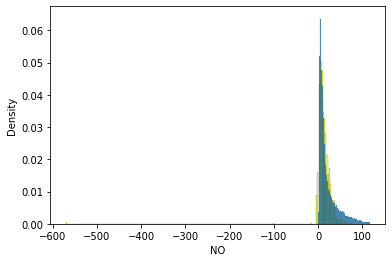

In [19]:
uniform_x = np.random.random(1000)
field = 'NO'
sampled = np.array([inv_cdf(p, lambda x: stats.gamma.cdf(x, *params[field]), 10, 20) for p in uniform_x])
sampled
#sampled = stats.gamma.ppf(uniform_x, *params[field])
sns.histplot(sampled, stat='density', color='yellow')
sns.histplot(df_cont[field], stat='density')

In [321]:
from scipy.interpolate import interp1d

y, x = np.histogram(df_cont['NO2'], density=True)
f = interp1d(x[:-1], y, fill_value=0, bounds_error=False)
f(x), y


(array([0.00186302, 0.01489812, 0.02035239, 0.01605698, 0.01254219,
        0.00781623, 0.00435375, 0.0022815 , 0.00113069, 0.00054321,
        0.        ]),
 array([0.00186302, 0.01489812, 0.02035239, 0.01605698, 0.01254219,
        0.00781623, 0.00435375, 0.0022815 , 0.00113069, 0.00054321]))

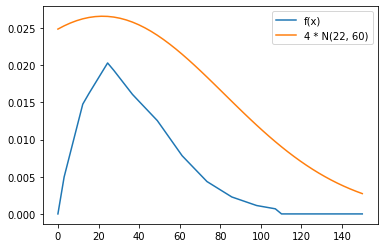

In [325]:
x = np.linspace(0, 150)
y = f(x)
m, mu, sigma = 4, 22, 60
y2 = m * stats.norm.pdf(x, mu, sigma)
plt.plot(x, y, label='f(x)')
plt.plot(x, y2, label=f'{m} * N({mu}, {sigma})')
plt.legend()

In [326]:
def generate_reject_sampling(f, m, mu, sigma, N=10000):
    result = []
    for _ in range(N):
        candidate = np.random.normal(mu, sigma)
        prob_accept = f(candidate) / (m * stats.norm.pdf(candidate, mu, sigma))

        if np.random.random() < prob_accept:
            result.append(candidate)
    return np.array(result)

In [327]:
generated = generate_reject_sampling(f, m, mu, sigma)
generated.shape

(2520,)

<AxesSubplot:xlabel='NO2', ylabel='Density'>

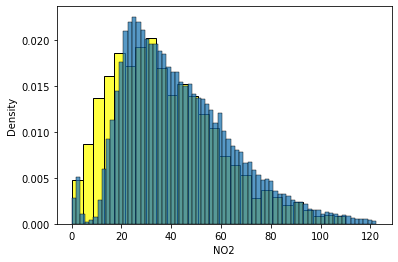

In [329]:
sns.histplot(generated, stat='density', color='yellow')
sns.histplot(df_cont['NO2'], stat='density')

# Correlation estimation
## Overall corelation

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

In [69]:
df_cont = df[continues_fields]
df_cont.head()

,NO,CO,NO2,O3,NOx,Benzene,Toluene,AQI,PM2.5,NH3
0,8.665,0.715,50.120,43.880,56.605,2.245,8.720,269.0,64.315,36.710
1,11.000,0.875,50.735,44.930,62.195,2.705,11.130,248.5,67.415,34.555
2,8.565,0.955,45.135,64.470,53.585,3.290,13.935,251.0,59.835,36.360
3,7.680,0.795,35.390,49.535,42.720,4.075,18.015,253.5,74.330,31.680
4,8.410,1.215,35.815,46.155,43.375,4.895,15.110,256.5,82.000,33.530


<AxesSubplot:>

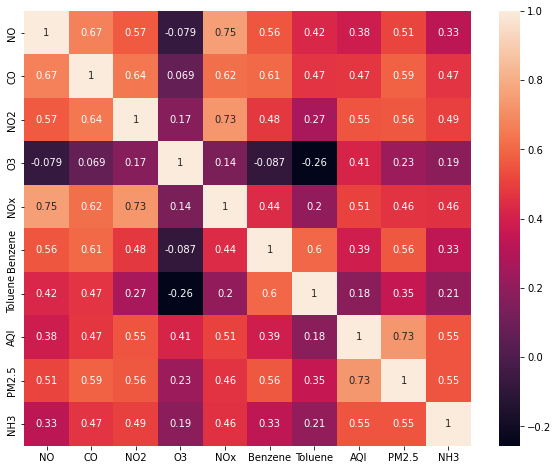

In [70]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True)

In [47]:
stats.pearsonr(df_cont['PM2.5'], df_cont['AQI'])

(0.725913632129718, 0.0)

## Target-predictors correlation

<AxesSubplot:>

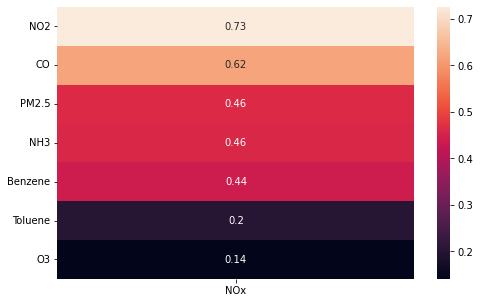

In [104]:
plt.figure(figsize=(8, 5))
corr = pd.DataFrame(df_cont[predictors].corrwith(df_cont['NOx']).sort_values(ascending=False), columns=['NOx'])
sns.heatmap(
   corr,
   annot=True
)


<AxesSubplot:>

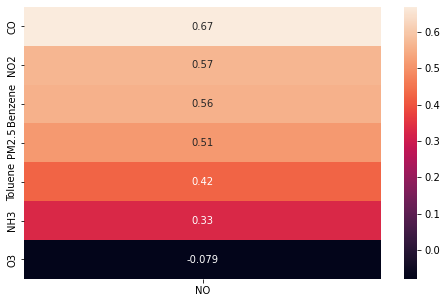

In [105]:
plt.figure(figsize=(8, 5))
corr = pd.DataFrame(df_cont[predictors].corrwith(df_cont['NO']).sort_values(ascending=False), columns=['NO'])
sns.heatmap(
   corr,
   annot=True
)

<AxesSubplot:>

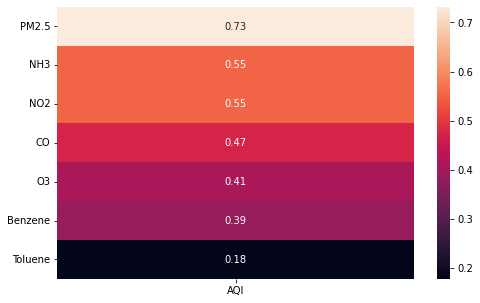

In [106]:
plt.figure(figsize=(8, 5))
corr = pd.DataFrame(df_cont[predictors].corrwith(df_cont['AQI']).sort_values(ascending=False), columns=['AQI'])
sns.heatmap(
   corr,
   annot=True
)


# Building Bayesian network based on multivariate analysis

In [29]:
import os, sys
sys.path.insert(0, './BAMT/')

In [30]:
from BAMT.preprocess.discretization import discretization, get_nodes_type, code_categories, get_nodes_sign
from BAMT.bayesian.train_bn import structure_learning, parameter_learning
from BAMT.visualization.visualization import draw_BN
from BAMT.bayesian.sampling import generate_synthetics
from BAMT.external.libpgm.hybayesiannetwork import HyBayesianNetwork
from BAMT.bayesian.save_bn import save_structure, save_params, read_structure, read_params

In [99]:
my_bn = {
    'V': continues_fields,
    'E': [
        ['PM2.5', 'AQI'],
        ['NH3', 'AQI'],
        ['NO2', 'AQI'],
        ['CO', 'NO'],
        ['NO2', 'NO'],
        ['Benzene', 'NO'],
        ['NO2', 'NOx'],
        ['CO', 'NOx'],
        ['PM2.5', 'CO'],
        ['PM2.5', 'NH3'],
        ['NO2', 'CO'],
        ['Benzene', 'CO'],
        ['Toluene', 'Benzene']
    ]
}

In [173]:
draw_BN(my_bn, nodes_type, '../results/LW3/my_bayess')
1

1

# Building Byaesian network based on structural learning

In [61]:
df_train, df_test = sk.model_selection.train_test_split(df_cont, train_size=0.7, random_state=42)
df_test.head()

,NO,CO,NO2,O3,NOx,Benzene,Toluene,AQI,PM2.5,NH3
5478,20.386000,1.024000,67.986000,125.606000,87.460000,9.654000,20.438000,319.600000,179.332000,45.072000
6769,1.870000,0.495000,35.795000,130.290000,34.430000,0.920000,3.130000,342.500000,128.750000,18.215000
1487,2.580000,1.173333,40.083333,59.563333,111.526667,1.503333,4.443333,128.666667,53.000000,39.050000
532,10.997500,0.862500,36.582500,151.725000,49.155000,1.190000,2.002500,373.250000,184.610000,33.520000
40173,13.273333,0.825833,31.963333,17.527778,30.189444,2.384167,16.829444,112.944444,56.931944,22.031111


In [62]:
nodes_type = get_nodes_type(df_cont)
nodes_type

{'NO': 'cont',
 'CO': 'cont',
 'NO2': 'cont',
 'O3': 'cont',
 'NOx': 'cont',
 'Benzene': 'cont',
 'Toluene': 'cont',
 'AQI': 'cont',
 'PM2.5': 'cont',
 'NH3': 'cont'}

In [63]:
nodes_sign = get_nodes_sign(df_cont)

In [64]:
discrete_data, coder = discretization(df_train, 'equal_frequency', columns=continues_fields, bins=10)

In [67]:
discrete_data.head()

,NO,CO,NO2,O3,NOx,Benzene,Toluene,AQI,PM2.5,NH3
0,8,7,6,1,7,7,8,4,7,6
1,0,0,1,3,0,0,0,0,0,0
2,2,7,7,9,6,7,6,9,8,8
3,3,2,2,7,2,3,7,3,2,3
4,0,0,2,4,0,0,0,0,0,0


<AxesSubplot:xlabel='NOx', ylabel='Density'>

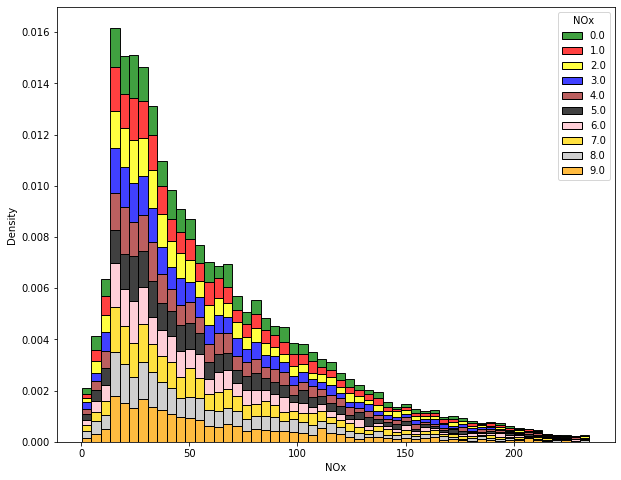

In [66]:
plt.figure(figsize=(10, 8))
sns.histplot(x=df_train['NOx'], hue=discrete_data['NOx'], 
    stat='density', 
    palette=['green', 'red', 'yellow', 'blue', 'brown', 'black', 'pink', 'gold', 'silver', 'orange'],
    multiple='stack')


In [92]:
bn = structure_learning(discrete_data, 'HC', nodes_type, 'MI')

In [135]:
draw_BN(bn, nodes_type, '../results/LW3/HC_MI_bayess')
1

1

In [100]:
params_mi = parameter_learning(df_train, nodes_type, my_bn, 'simple')

In [101]:
save_structure(my_bn, 'socio_net_structure')
skel = read_structure('socio_net_structure')
save_params(params_mi, 'socio_net_param')
params = read_params('socio_net_param')
my_bn_model = HyBayesianNetwork(skel, params)

In [71]:
synth_df = generate_synthetics(my_bn_model, nodes_sign, 'simple', 1000)
synth_df.head()

,AQI,PM2.5,NO2,NOx,NO,O3,CO,Toluene,Benzene,NH3
0,216.129560,137.457851,66.379692,88.218164,49.883588,20.383371,1.168488,18.237423,0.642256,35.888936
1,242.590690,41.929405,64.176637,126.707622,45.914665,50.963352,1.579324,2.040901,2.709323,26.158434
2,212.921606,126.035019,53.613254,49.217876,24.776863,67.660149,0.960576,19.998518,8.266641,41.942192
3,135.386042,57.728984,47.038667,3.152993,5.198197,73.672893,1.186364,21.845158,8.497092,30.198119
4,214.883617,146.235379,80.964790,71.965310,40.835040,58.572980,1.130274,12.484899,3.617156,26.077595


# Quality analysis

<AxesSubplot:xlabel='AQI', ylabel='Density'>

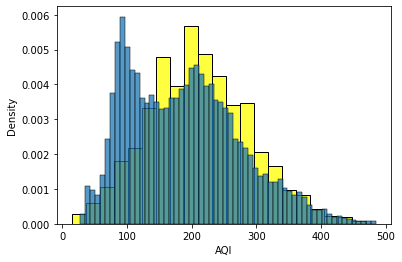

In [72]:
sns.histplot(synth_df['AQI'], stat='density', color='yellow')
sns.histplot(df_cont['AQI'], stat='density')

<AxesSubplot:xlabel='NO', ylabel='Density'>

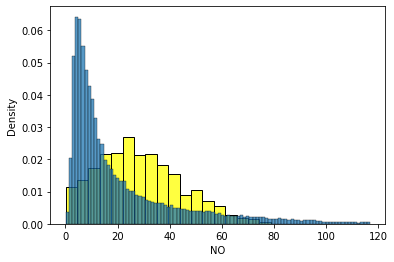

In [179]:
sns.histplot(synth_df['NO'], stat='density', color='yellow')
sns.histplot(df_cont['NO'], stat='density')

<AxesSubplot:xlabel='NOx', ylabel='Density'>

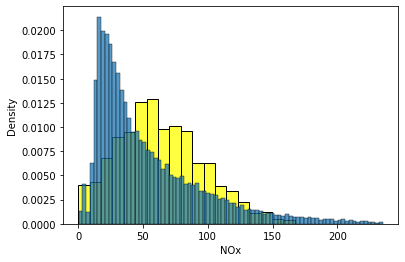

In [181]:
sns.histplot(synth_df['NOx'], stat='density', color='yellow')
sns.histplot(df_cont['NOx'], stat='density')

In [73]:
from BAMT.bayesian.calculate_accuracy import calculate_acc

In [78]:
df_test_small = df_test.sample(600)
df_test_small.head()

,NO,CO,NO2,O3,NOx,Benzene,Toluene,AQI,PM2.5,NH3
11192,3.9075,1.5475,45.0775,69.0450,39.2575,6.2175,14.4500,379.50,146.1925,45.8775
1008,15.5950,1.0225,48.7375,50.5475,66.4375,1.6625,4.4125,335.25,66.9150,47.4875
15606,6.7350,0.3400,51.3650,27.8250,46.8550,3.9350,23.5650,236.50,105.6750,30.7200
17305,4.2000,0.0000,25.1500,29.3800,16.8000,0.1300,4.1500,39.00,22.0000,5.3200
6700,35.5320,0.8940,48.8100,87.9160,89.9460,4.2340,6.0400,239.00,77.8520,25.5680


In [102]:
res = calculate_acc(my_bn_model, df_test_small, columns=targets, method='simple')

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [81]:
from sklearn import metrics

In [103]:
res[1]

{'AQI': 53.741, 'NO': 17.095, 'NOx': 30.698}

In [87]:
metrics.mean_squared_error(res[2][0], res[3][0], squared=False)

87.26589555364511

In [91]:
np.array(res[2][2]).std()

42.4598010027365

In [98]:
df_test_small[targets].std()

AQI    87.267476
NO     21.883739
NOx    42.495228
dtype: float64